In [1]:
from skimage import io, util #added util for cropping
from matplotlib import pyplot as plt
import numpy as np

# Task 1

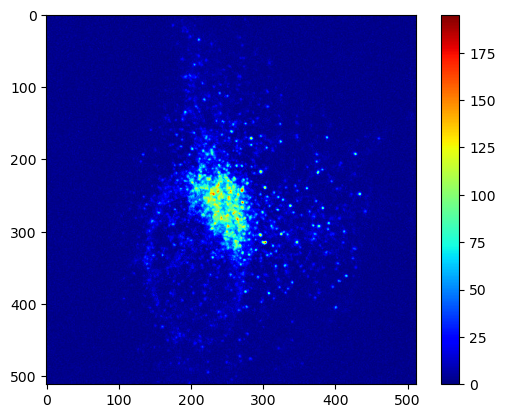

In [3]:
img_data = plt.imread('golgi-movie_robert_frame_01_gray.jpg') #importing the first frame
plt.imshow(img_data, cmap='jet') #plotting intensity on blue to red based on pixel values
plt.colorbar()

# Task 2

type(img_data)=<class 'numpy.ndarray'>
img_data.shape=(512, 512)
img_data.min()=0
195
1678097


Text(0.5, 1.0, 'Background noise values')

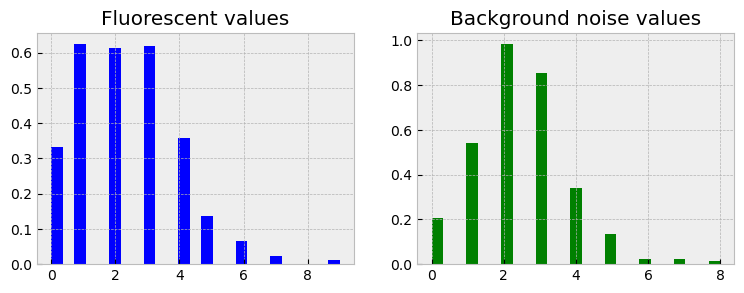

In [3]:
print(f'{type(img_data)=}', 
      f'{img_data.shape=}', #dimension of image, 1D image in W and B channels. Gray scale. 512 x 512 pixels
      f'{img_data.min()=}', #tells us the dimmest pixel, which is 0, likely background noise
      f'{img_data.max()}', #brightest pixel value
      f'{img_data.sum()}', #sums all the overall brightness of pixels in the image
      sep='\n')

plt.style.use('bmh')
fluorescent_data = img_data[:, 0].flatten() #white channel, means fluorescent signal
bg_data = img_data[:, 1].flatten() #black channel, means background signal

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(9, 3))
ax_fluorescent, ax_background = ax


ax_fluorescent.hist(fluorescent_data, color='blue', bins=25, density=True) #bins is thickness of the bars
ax_fluorescent.set_title('Fluorescent values')
# ax_fluorescent.set_xlabel('Pixel locality') #keep in view


ax_background.hist(bg_data, color='green', bins=25, density=True)
ax_background.set_title('Background noise values')

# Task 3

In [6]:
total_fluorescence = [] #empty list for the loop to append into everytime it iterates

for i in range(1, 18): #since the file is named 01 - 17, use range(). But, cannot factor in the leading zero of single numbers.
    img = io.imread(f'golgi-movie_robert_frame_{i:02}_gray.jpg') #0 refers to adding leading zeros if needed, and 2 specifies the minimum character in the number which is 2. single digit no. will have leading zeros added to it.
    total_fluorescence.append(img.sum()) #since the graph Y axis uses total fluorescence signal, sum is most appropriate. After it calculates the sum, add it to total_fluorescence list 

print(total_fluorescence) #sanitary check to see if my function works and forms a complete list of 17 values

[1678097, 1635644, 1816652, 1777037, 1747933, 1689746, 1651677, 1603658, 1484451, 1413813, 1339107, 1287205, 1223687, 1170396, 1123362, 1057297, 1030133]


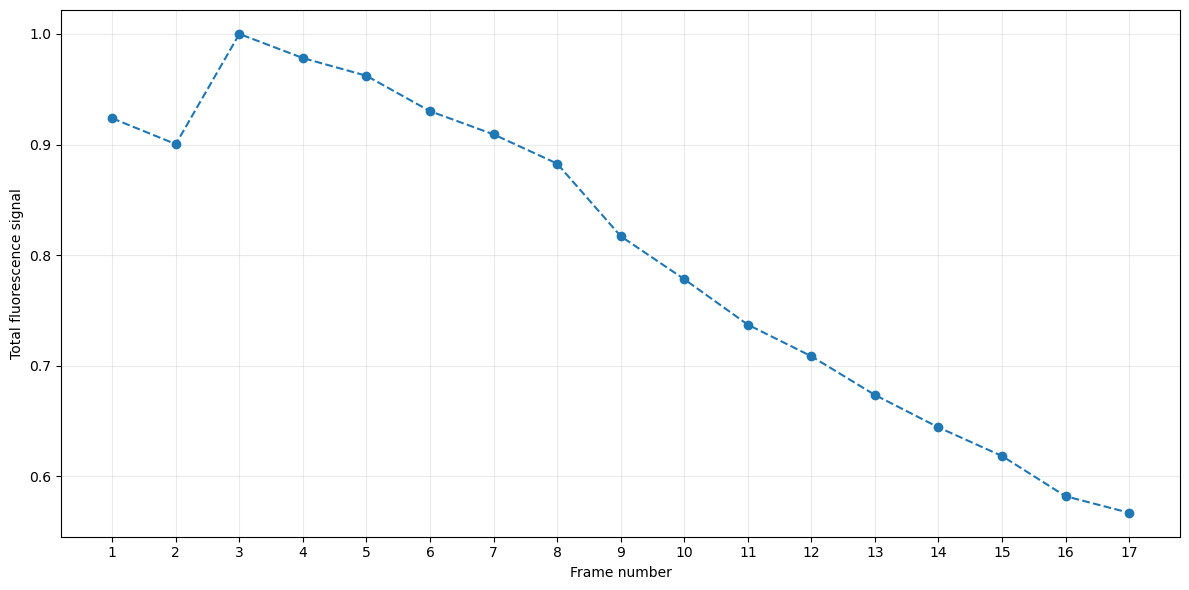

In [23]:
x = range(1,18)
y = total_fluorescence / max(total_fluorescence) #Normalised to the img with the highest total brightness 

#plotting segment
plt.figure(figsize = (12, 6)) #setting the figure size, has to be before plt.plot
plt.plot(x, y, linestyle = 'dashed', marker = 'o') #marker is the data point, marked as circle.

#labels
plt.xticks(x) #this makes it show every tick in X axis
plt.xlabel('Frame number', fontsize = 10)
plt.ylabel('Total fluorescence signal', fontsize = 10)

#aesthetics
plt.grid(alpha = .25)

plt.tight_layout() #trying out
plt.show()

# Task 4

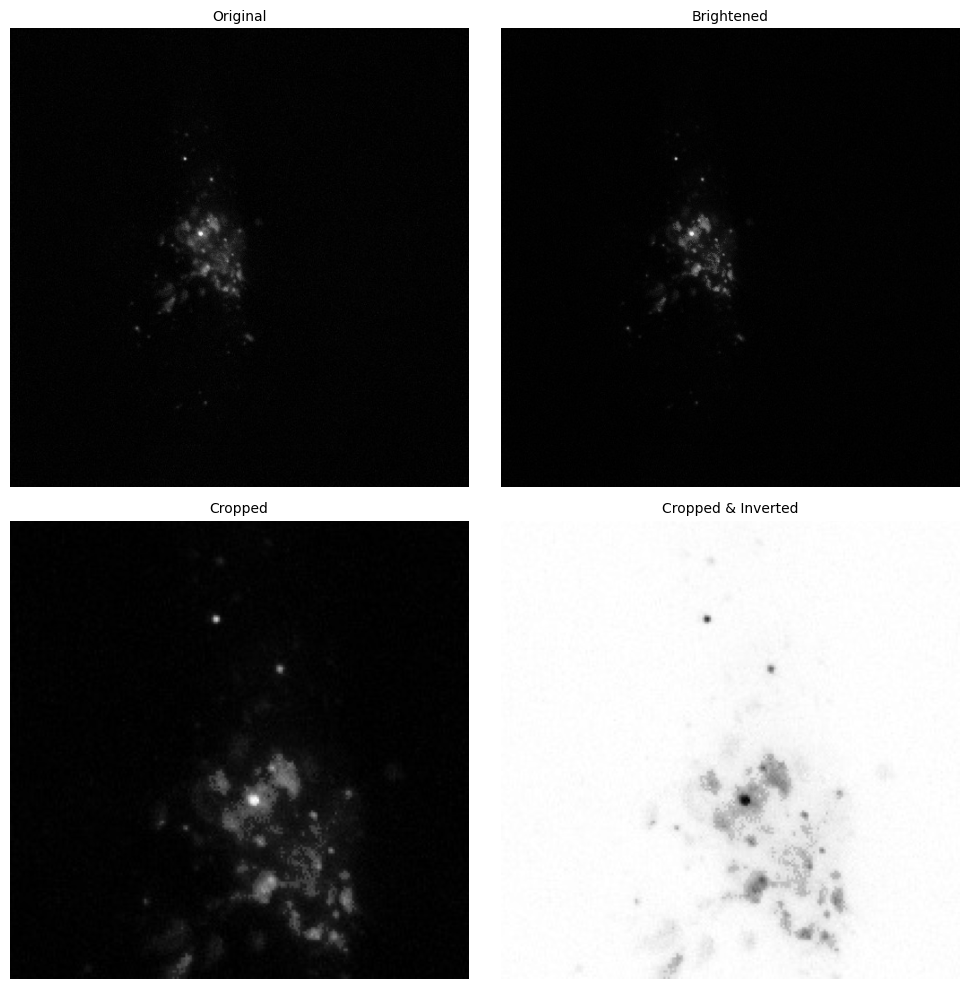

In [5]:
img = plt.imread('golgi-movie_robert_frame_17_gray.jpg') #reads the image and returns as numpy array
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))

#assigning them into their 2D array position
ax_original = ax[0, 0]
ax_brightened = ax[0, 1]
ax_cropped = ax[1, 0]
ax_cropped_inverted = ax[1, 1]

#Plotting
ax[0, 0].imshow(img, cmap='gray')
ax[0, 0].set_title('Original', fontsize = 10)
ax[0, 0].axis('off') #removing axis for this subplot

#For brightening of img
brightened_img = img.astype(np.float32) #converting uint8 to float32, so can do masking. uint8 result might exceed 255, leading to error
mask = brightened_img > 50
brightened_img[mask] = brightened_img[mask] * 1.5 #if values >50, *1.5 and replace brightened_img
#numpy.where()

ax[0, 1].imshow(brightened_img, cmap='gray')
ax[0, 1].set_title('Brightened', fontsize = 10)
ax[0, 1].axis('off')

cropped_img = util.crop(brightened_img, (100 , 200), (150, 200)) #trial and error. SHIFT IT DOWN MORE
ax[1, 0].imshow(cropped_img, cmap='gray')
ax[1, 0].set_title('Cropped', fontsize = 10)
ax[1, 0].axis('off')

inverted_img = cropped_img.max() - cropped_img
ax[1, 1].imshow(inverted_img, cmap='gray')
ax[1, 1].set_title('Cropped & Inverted', fontsize = 10)
ax[1, 1].axis('off')

plt.tight_layout()
plt.show()